# mpl_colors
- abrí este nuevo ipynb para ir cerrando/probando todo lo de mpl_tints

## Lista de inclusiones
1. Adicionar los dicts de colores propio al modulo mpl_tints - DONE (automotive, education, financial, programming) - falta algo mas de tech y ver si seguimos incorporando más Brands o no
2. Crear las función get_hex_color() - Existirán dos maneras de invocar los colores propios: - DONE mpl_tints.get_hex_color()
    - con la función get_hex_color('nombre_color') 
    - o directamente pidiendo el valor al dic de colores específico mpl_tints.AUTOMOTIVE_COLORS['nombre_color'] -> También me da el valor hexa del color.
3. crear la función get_named_colors_mapping() propia de mpl_tints que podría llevar el mismo nombre ¿?  - DONE __MismoNombre__
4. CREE la funct. ax_one_color() y plot_a_color() que llama a la primera y me permite imprimir colores matplotlib y jm_colors - DONE
5. RETOMAR plot_colors() para que funcione con TODOOO, ooj al mostrar listado que puede ser que si mostramos todos los dics en los más largos hacemos un nro reducido de colores.
6. Se me ocurrieron otras funciones como make_palette(brand) que me puede generar la paleta MTM o adidas o python y registrarla y todo ... veremos.

In [1]:
# Standard Libs
from typing import Optional
import random

# Third-Party Libs
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Local Libs
import jm_utils.data.mpl_tints as mpl_tints


In [2]:
# 4. Ahora viene lo lindo de la pequeña plot colors
def plot_colors(
        color_group: Optional[str | list[str]] = 'SAMPLE',
        alpha: Optional[float | None] = None,
        n_cols: Optional[int] = 6,
        sort_colors: Optional[bool] = True,
        hex_value: Optional[bool] = False
) -> tuple[plt.Figure, plt.Axes]:
    
    # Build the dictionary containing the color names sorted by category (dict key)
    colors_by_group_dic = mpl_tints.COLORS_NAMES_BY_GROUP

    # Add 'SAMPLE' key entry to colors_by_group_dic, value: (Sample of 8 colors of e/category, and a Description)
    list_of_pltt_lists = [value[0] for value in colors_by_group_dic.values()]              # Needed as source of data to get a random sample of 4 palettes of e/category
    colors_by_group_dic['SAMPLE'] = (                                                      # Added 'Sample' dict_key
        [color for c_g in list_of_pltt_lists for color in random.sample(c_g, k=8)],           # A random sample of 8 of e/category
        "8 colors of e/category: 8 BASE_COLORS, 8 CSS4_COLORS, 8 TABLEAU_COLORS, 8 XKCD_COLORS")

    # First internal aux. funct. _plot_dic(): generates a figure containing the names of the palettes according to their category
    def _show_dic(dic):
        all_text =""
        for group_name, (color_list, description) in dic.items():
            if group_name == 'SAMPLE':          # Sample list is not showed
                continue
            sp, ncols = 21, 10                  # sp: space between color names, n_cols: number of columns
            if group_name == 'XKCD_COLORS':
                sp, ncols = 27, 8               # Grater space between color names and less columns
                
            all_text += f"* {group_name} ({len(color_list)}).- {description}:\n"    # Category label and description

            # Dashed subline construction
            leng_ln = len(group_name) + len(description) + 12
            n_dashes = leng_ln if leng_ln < 151 else 150
            all_text += '-' * n_dashes + "\n"

            # Formeatado con f-strings
            for i, color in enumerate(color_list):
                all_text += f"{color:<{sp}}"
                if (i + 1) % ncols == 0:
                    all_text += '\n' if color != color_list[-1] else ''
            all_text += '\n\n\n'

        # Build de Figure showing all text
        fig, ax = plt.subplots(figsize=(20, len(all_text.splitlines()) * 0.2))
        ax.set_axis_off()                          # Hide x and y axis
        ax.set_title('Matplotlib colors names by category (color_group)', fontsize=12, fontweight='medium', family="monospace")
        ax.text(0.025, 0.46, all_text, fontsize=10, va="center", ha="left", family="monospace")
        plt.show()
        return fig, ax

    # 2nd internal aux. funct. _search_request(): build a color_grp_names_lst based on colors requested to find
    def _get_the_required_search(search):

        # Build a big list (most_colors) w/all colors, where we we'll search (except BASE_COLORS, those will be allocated en a dict)
        base_colors_lst = dic['BASE_COLORS'][0]
        most_colors_lst = dic['CSS4_COLORS'][0] + dic['TABLEAU_COLORS'][0] + dic['XKCD_COLORS'][0]
        
        base_colors_fullname_lst = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']
        base_colors_dic = dict(zip(base_colors_fullname_lst, base_colors_lst))         # dict(zip(keys, values))

        # Beging the search in the most_color_lst and the base_colors_dic
        searched_colors_lst = search.split()[1:]        # only the colors (or strings to search for) separating it from the word 'FIND '
        # found_colors = [color for color in searched_colors_lst if color.lower() in most_colors_lst] # FUTURE
        colors_lst_tmp = []
        for target in searched_colors_lst:
            try:                                        # Cause key could not exist in base_colors_dic                                
                colors_lst_tmp.append(base_colors_dic[target.lower()])
            except KeyError:
                pass
            filtered_colors = list(filter(lambda color: target.lower() in color.lower(), most_colors_lst))
            colors_lst_tmp.append(filtered_colors.copy())

        found_colors = [color for sublist in colors_lst_tmp for color in sublist]              # color_grp_names_lst to plot. All colors found in a single list of strings
        if not found_colors:
            return ['none']
        else:
            return found_colors

    # Validate and preprocess palette_group parameter: get the palette_group_key, print lists/names if selected, or fill custom list
    if isinstance(color_group, str):          
        color_group_key = color_group.strip().upper()
        if color_group_key == 'NAMES':
            fig, ax = _show_dic(colors_by_group_dic)
            return fig, ax
        elif color_group_key.startswith('FIND '):                    # Acá vamos a hacer un jorgitomonteada
            color_grp_names_lst = _get_the_required_search(color_group_key)   
            color_group_desc = color_group_key
            color_group_key = 'Search request'
        elif color_group_key not in colors_by_group_dic.keys():
            raise ValueError(f"Invalid value for 'palette_group': {repr(color_group)}. Expected one of:" 
                             "BASE_COLORS', 'CSS4_COLORS', 'TABLEAU_COLORS', 'XKCD_COLORS', 'SAMPLE' (default), 'NAMES'.")
        else:
            # Get the color_grp_names_lst and color_group_desc of the selected color category (group) - color_group_key
            color_grp_names_lst, color_group_desc = colors_by_group_dic[color_group_key]
                
    elif isinstance(color_group, list):   
        color_group_key = 'Custom'              # Only for title, no a new entry to de dictionary
        color_grp_names_lst = color_group      # The list of entered palettes to be shown
        color_group_desc = 'User selected colors'
    else:
        raise TypeError(f"Invalid type for 'palette_group': {repr(color_group)}. Expected one of: 'str' or 'list'.")
    
    # Sort colors by hue (tono), saturation, value and name (if sort_colors param id True). Reorder color_list 
    if sort_colors is True:                       
        color_grp_names_lst = sorted(color_grp_names_lst, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))

    # Buil the fig. with colors and colors names of the selected group: color_group_key: (color_grp_names_lst, color_group_desc)
    cell_width, cell_height, swatch_width, margin = 212, 22, 48, 12

    nrows = np.ceil(len(color_grp_names_lst) / n_cols)

    width = cell_width * n_cols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * n_cols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(f"* {color_group_key} ({len(color_grp_names_lst)}).- {color_group_desc}:\n",
                 fontsize=14, fontweight='bold')

    for i, color_name in enumerate(color_grp_names_lst):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        color_label = color_name if hex_value is False else mcolors.to_hex(color_name)
        ax.text(text_pos_x, y, color_label, fontsize=14, ha='left', va='center')

        ax.add_patch(
            # Rectangle(xy=(swatch_start_x, y-9), width=swatch_width, height=18, facecolor=(color_name, alpha), edgecolor='0.7')
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width, height=18, facecolor=color_name, edgecolor='0.7', alpha=alpha)
        )

    return fig, ax


In [11]:
fig, ax = plot_colors('Automotive_colors')

ValueError: Invalid RGBA argument: 'audi'

In [4]:
# 3. Veamos ahora la función mcolors.get_named_colors_mapping()
dict(sorted(mcolors.get_named_colors_mapping().items(), key=lambda x: x[0].lower()))
dict(sorted(mpl_tints.get_named_colors_mapping().items(), key=lambda x: x[0].lower()))
# sorted(mcolors.get_named_colors_mapping().items(), key=lambda x: x[0])


{'365 DataScience': '#108999',
 '365 DataScience-1': '#108999',
 '365 DataScience-2': '#ee4f23',
 '365 DataScience-3': '#748190',
 '365 DataScience-4': '#1e9438',
 '365 DataScience-5': '#175f69',
 '365 DataScience-6': '#8f2f15',
 '365 DataScience-7': '#485361',
 '365 DataScience-8': '#0d6323',
 '365 DataScience-9': '#9fd0d6',
 'adyen': '#0abf53',
 'adyen-1': '#0abf53',
 'adyen-2': '#00112c',
 'aiesec': '#037ef3',
 'aiesec-1': '#037ef3',
 'aiesec-10': '#f3f4f7',
 'aiesec-2': '#f85a40',
 'aiesec-3': '#00c16e',
 'aiesec-4': '#7552cc',
 'aiesec-5': '#0cb9c1',
 'aiesec-6': '#f48924',
 'aiesec-7': '#ffc845',
 'aiesec-8': '#52565e',
 'aiesec-9': '#caccd1',
 'american-express': '#002663',
 'american-express-1': '#002663',
 'american-express-2': '#4d4f53',
 'amp': '#1c79c0',
 'amp-1': '#1c79c0',
 'amp-2': '#0dd3ff',
 'amp-3': '#0389ff',
 'angularjs': '#b52e31',
 'angularjs-1': '#b52e31',
 'angularjs-2': '#000000',
 'audi': '#ffffff',
 'audi-1': '#ffffff',
 'audi-2': '#000000',
 'audi-3': '#f505

In [5]:
# 1. Veamos ahora los diccionarios de colores
print(mpl_tints.AUTOMOTIVE_COLORS)
print(mcolors.TABLEAU_COLORS)

{'audi': '#ffffff', 'audi-1': '#ffffff', 'audi-2': '#000000', 'audi-3': '#f50537', 'continental-ag': '#ffa500', 'continental-ag-1': '#ffa500', 'continental-ag-2': '#00a5dc', 'continental-ag-3': '#004eaf', 'continental-ag-4': '#2db928', 'continental-ag-5': '#057855', 'continental-ag-6': '#ff2d37', 'continental-ag-7': '#000000', 'continental-ag-8': '#737373', 'continental-ag-9': '#969696', 'continental-ag-10': '#cdcdcd', 'continental-ag-11': '#f0f0f0', 'daimler': '#263f6a', 'daimler-1': '#263f6a', 'daimler-2': '#182b45', 'daimler-3': '#6b0f24', 'daimler-4': '#193725', 'daimler-5': '#606061', 'ferrari': '#e32119', 'ferrari-1': '#e32119', 'fiat': '#96172e', 'fiat-1': '#96172e', 'fiat-2': '#6d2d41', 'ford': '#1c396d', 'ford-1': '#1c396d', 'kia': '#c21a30', 'kia-1': '#c21a30', 'lamborghini': '#ddb321', 'lamborghini-1': '#ddb321', 'nexar': '#fbb040', 'nexar-1': '#fbb040', 'nexar-2': '#44355b', 'nexar-3': '#31263e', 'nexar-4': '#ee5622', 'nexar-5': '#221e22', 'rolls-royce': '#680021', 'rolls-r

'#f50537'

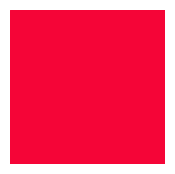

In [6]:
# 2. Hicimos una funcioncita plot_color() muy simple para probar los colores propios
mpl_tints.plot_a_color("audi-3")
mpl_tints.get_hex_color("audi-3")


In [7]:
mcolors.BASE_COLORS['k']

(0, 0, 0)

#008000


AttributeError: module 'jm_utils.data.mpl_tints' has no attribute 'ax_a_color'

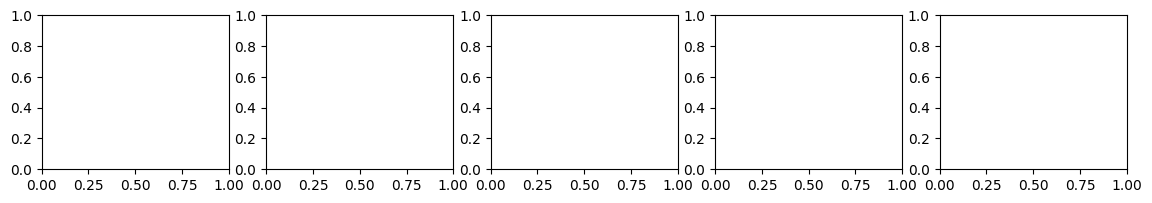

In [8]:
mcolors.BASE_COLORS['g']
hg = mcolors.rgb2hex('g')
print(hg)

# mpl_tints.plot_a_color_name('g')
# mpl_tints.plot_a_color_name(hg)

fig, axs = plt.subplots(1, 5, figsize=(14, 2))
mpl_tints.ax_a_color(axs[0], 'g')
mpl_tints.ax_a_color(axs[1], hg)
mpl_tints.ax_a_color(axs[2], '365 DataScience')
mpl_tints.ax_a_color(axs[3], 'python')
# mpl_tints.ax_a_color_name(axs[4], (0.75, 0.75, 0))
mpl_tints.ax_a_color(axs[4], (0, 0, 0))
# mpl_tints.ax_a_color_name(axs[4], 'y')



In [ ]:
## probemos suma de dicts
d1 = {1: 10, 2: 20, 3: 30}
d2 = {2: 45, 5: 55, 6: 65}
d3 = {**d1, **d2}           # Ojo deja un solo valor, EL ULTIMO
d3

# d3 = {k: d1.get(k, 0) + d2.get(k, 0) for k in set(d1) | set(d2)}
# d3

## Tengo tanto lío que voy a tenner que ir escribiendo con fecha.
- 17/8/25: Se abrió todo un mundo nuevo con el tema de registrar: (claude)
  - Registrar paletas (ya hice), pero tengo que probar a ver como se ver el tema del N (n_bins) - DONE (n_bins continuos, para los quelitatives N = len(colors))
  - Registrar el reversed de cada paleta - DONE (hay al menos dos formas de hacerlo, lo hice con mayor utilización del objeto cmap_custom.reversed() que tiene default name '_r)
  - Registrar COLORES?, como existen los BASE_COLORS y los CSS4_COLORS, etc. , registrar mi propio grupo de colores (no creo y por ahí no es tan importante)
  - PERO todo esto para crear grupitos de dos o tres (hasta 4 podría ser) COLORES (paletitas) para hcer graficos tipo Pareto o Pie de pocos wedges u otros con 3, 4 o 5 colores asociados
  - Y TAMBIEN, para que en el PIE chart, por ej, NO saque los extremos de las paletas Qualitatives.. , o solo saque en los secuenciales ?
  - DEBERÏA hacer ejemplos de uso de las paletas, o sea funciones que muestren charts donde se puedan ver el uso de los diferentes grupos de paletas y de paso probar distintas paletas del mismo grupo en un dato gráfico (algo asi como hacer un figure 2 ,2 y cada chart con una paleta distinta.
  - A seguir el lunes con la registración, y terminar el plot_colors (le falta el tema de pasar una lista con los colors que quiero ver) - revisar si tengo ok la última version del plot_palettes..
- 17/8/25: ya registre mis cmaps usando register_a_cmap()
- 16/8/25: voy a hacer algo más en colors, obtener combinaciones de dos y tres colores para presentaciones muy profesionales. MTM por ej puedo azul, naranja, gris.
        Pero antes voy a dejar firme las Last Vers. de plot_pltts y plot_colors
- 16/8/25: Ya tengo listo el plot_mpl_palettes() y el plot_mpl_colors() y también los dicts así que me parece quev oy a dejar acá este tema 
        sin hacer nada de diferenciar ax de figure o de estudiar el tema de subfigures e impacatar todo lo que tengo en mpl_tints para seguir
